# The webscraper to scrape 5 kinds of vehicles (car, bike, bus, plain, boat).

In [1]:
!pip install requests
!pip install BeautifulSoup4
!pip install selenium


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Obtaining dependency information for soupsieve>1.2 from https://files.pythonhosted.org/packages/4c/f3/038b302fdfbe3be7da016777069f26ceefe11a681055ea1f7817546508e3/soupsieve-2.5-py3-none-any.whl.metadata
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/fc/df/a8972c41279fc9e9404cad87bc1f4d6d3d824b84c5c072dca0e986a89680/selenium-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/fa/63/0807d3bc1742adffd2bac458829f3f71ce3aa29bec44a8ac008aed2b467c/outcome-1.3.0-py2.py3-none-any.whl.metadata
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Obtaining dependency information for cffi>=1.14 from https://files.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

from keras import optimizers
from keras import layers

from selenium import webdriver
from selenium import webdriver
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import urllib.request
import random

In [16]:


#image_urls = []
# Launch Chrome browser
browser = webdriver.Chrome()
browser.get('https://images.google.com/')

cookies = browser.find_element(By.ID,"L2AGLb")
cookies.click()

time.sleep(5)

def searchVehicles(vehicle):
# Open Google Images
    browser.get('https://images.google.com/')
# Search for "car pictures"
    search_box = browser.find_element(By.NAME,'q')
    search_box.send_keys(vehicle+' pictures')
    search_box.submit()

# Scroll down to load more images
    for i in range(5):
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

# Find and extract image URLs
    
    for img in browser.find_elements(By.XPATH,'//img[contains(@class,"rg_i")]'):
        image_urls.append(img.get_attribute('src'))



vehicles = ['car', 'motorbike', 'bus', 'plane', 'boat']
for vehicle in vehicles:
    image_urls = []
    searchVehicles(vehicle)
    if not os.path.exists('data/testing_set/'+vehicle):
            os.makedirs('data/testing_set/'+vehicle)
    if not os.path.exists('data/training_set/'+vehicle):
            os.makedirs('data/training_set/'+vehicle)

    i=0
    np.random.shuffle(image_urls)
    for url in image_urls:
        if i<=int(len(image_urls) * 0.2):
            try:
                urllib.request.urlretrieve(url, f"data/testing_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        else:
            try:
                urllib.request.urlretrieve(url, f"data/training_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        i+=1

browser.quit()

# EDA

In [21]:
import os

# Set the directory path where your images are located
directory_path = "./data"

# Initialize a count variable
count = 0

# List all files in the directory
all_files = os.listdir(directory_path)
for file in all_files:
    count += 1

print(f"The total amount of images is: {count}")
count = 0
vehicles = ['car', 'motorbike', 'bus', 'plane', 'boat']
for vehicle in vehicles:
    for file in all_files:
        if vehicle in file:
            count += 1

    print(f"Number of images with {vehicle} in the filename: {count}")
    count = 0

The total amount of images is: 2
Number of images with car in the filename: 0
Number of images with motorbike in the filename: 0
Number of images with bus in the filename: 0
Number of images with plane in the filename: 0
Number of images with boat in the filename: 0


In [92]:

train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

validation_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/testing_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 607 images belonging to 5 classes.


Found 149 images belonging to 5 classes.
Found 156 images belonging to 5 classes.


In [93]:
NUM_CLASSES = 5

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(200, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile and train your model as usual
model.compile(optimizer = optimizers.Adam(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 29, 29, 200)       57800     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 200)       0         
 ng2D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 14, 14, 200)     

In [94]:
NUM_CLASSES = 5
IMG_SIZE = 64
# There is no shearing option anymore, but there is a translation option
HEIGTH_FACTOR = 0.2
WIDTH_FACTOR = 0.2

# Create a sequential model with a list of layers
model_new = tf.keras.Sequential([
  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to rescale the pixel values to the [0, 1] range
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  layers.RandomTranslation(HEIGTH_FACTOR,WIDTH_FACTOR),
  layers.RandomZoom(0.2),



  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(), # Or, layers.GlobalAveragePooling2D()
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile and train your model as usual
model_new.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [95]:

# Set the parameters for your data
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='data/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='data/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Create the testing dataset from the 'test' directory
test_ds = image_dataset_from_directory(
    directory='data/testing_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size
)

Found 756 files belonging to 5 classes.
Using 605 files for training.
Found 756 files belonging to 5 classes.
Using 151 files for validation.
Found 156 files belonging to 5 classes.


In [96]:
history = model.fit(training_set,
                validation_data = validation_set,
                epochs = 20
                )

Epoch 1/20
19/19 [==============================] - 3s 113ms/step - loss: 0.5496 - accuracy: 0.2224 - val_loss: 0.5017 - val_accuracy: 0.3490
Epoch 2/20
19/19 [==============================] - 2s 112ms/step - loss: 0.4456 - accuracy: 0.3921 - val_loss: 0.4481 - val_accuracy: 0.4362
Epoch 3/20
19/19 [==============================] - 2s 105ms/step - loss: 0.4177 - accuracy: 0.4613 - val_loss: 0.4460 - val_accuracy: 0.4430
Epoch 4/20
19/19 [==============================] - 2s 105ms/step - loss: 0.3798 - accuracy: 0.5552 - val_loss: 0.4011 - val_accuracy: 0.5302
Epoch 5/20
19/19 [==============================] - 2s 104ms/step - loss: 0.3460 - accuracy: 0.6079 - val_loss: 0.4065 - val_accuracy: 0.4832
Epoch 6/20
19/19 [==============================] - 2s 104ms/step - loss: 0.3215 - accuracy: 0.6639 - val_loss: 0.4364 - val_accuracy: 0.5235
Epoch 7/20
19/19 [==============================] - 2s 103ms/step - loss: 0.3011 - accuracy: 0.6540 - val_loss: 0.4185 - val_accuracy: 0.5101
Epoch 

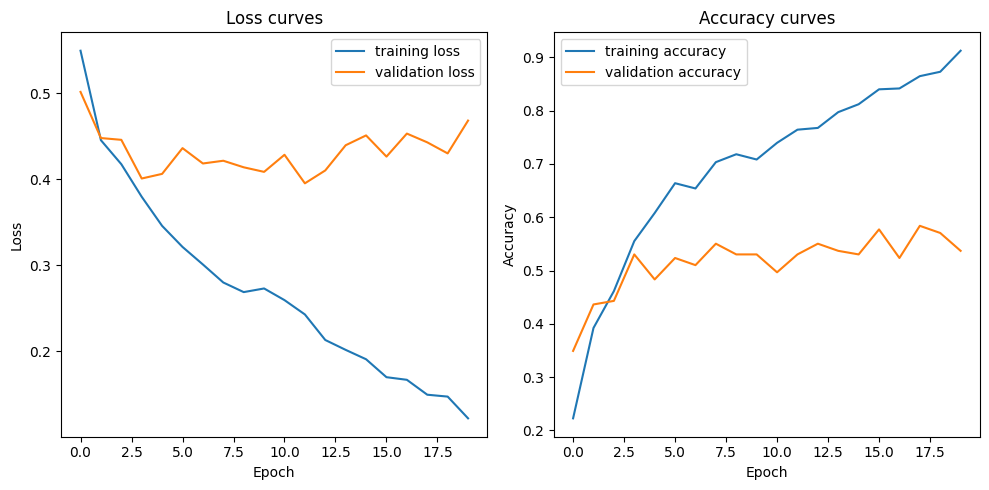

In [97]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [98]:
history2 = model_new.fit(train_ds,
                validation_data = validation_ds,
                epochs = 20
                )

Epoch 1/20


19/19 [==============================] - 2s 64ms/step - loss: 0.5299 - accuracy: 0.2579 - val_loss: 0.5275 - val_accuracy: 0.2980
Epoch 2/20
19/19 [==============================] - 1s 44ms/step - loss: 0.4748 - accuracy: 0.3322 - val_loss: 0.4716 - val_accuracy: 0.3444
Epoch 3/20
19/19 [==============================] - 1s 46ms/step - loss: 0.4518 - accuracy: 0.3835 - val_loss: 0.4780 - val_accuracy: 0.3841
Epoch 4/20
19/19 [==============================] - 1s 44ms/step - loss: 0.4367 - accuracy: 0.4264 - val_loss: 0.4960 - val_accuracy: 0.3311
Epoch 5/20
19/19 [==============================] - 1s 44ms/step - loss: 0.4264 - accuracy: 0.4413 - val_loss: 0.4408 - val_accuracy: 0.4305
Epoch 6/20
19/19 [==============================] - 1s 44ms/step - loss: 0.4105 - accuracy: 0.5107 - val_loss: 0.4503 - val_accuracy: 0.4305
Epoch 7/20
19/19 [==============================] - 1s 44ms/step - loss: 0.4112 - accuracy: 0.5041 - val_loss: 0.4571 - val_accuracy: 0.3841
Epoch 8/20
19/19 [======

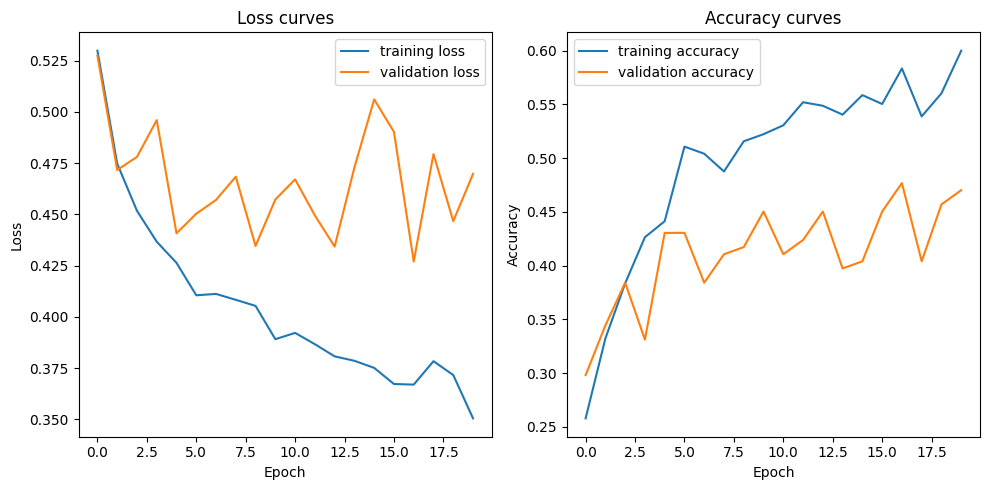

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history2.history['loss'], label='training loss')
ax1.plot(history2.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history2.history['accuracy'], label='training accuracy')
ax2.plot(history2.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [129]:
test_image = image.load_img("data/testing_set/motorbike/motorbike.1.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result2 = model_new.predict(test_image)
printString = 'I think it is a '

training_set.class_indices

if result[0][0] == max(result[0]):
    print(printString+'boat')
elif result[0][1] == max(result[0]):
    print(printString+'bus')
elif result[0][2] == max(result[0]):
    print(printString+'car')
elif result[0][3] == max(result[0]):
    print(printString+'motorbike')
elif result[0][4] == max(result[0]):
    print(printString+'plane')

print(result)
print(max(result[0]))

if result2[0][0] == max(result2[0]):
    print(printString+'boat')
elif result2[0][1] == max(result2[0]):
    print(printString+'bus')
elif result2[0][2] == max(result2[0]):
    print(printString+'car')
elif result2[0][3] == max(result2[0]):
    print(printString+'motorbike')
elif result2[0][4] == max(result2[0]):
    print(printString+'plane')

print(result2)
print(max(result2[0]))

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step
I think it is a motorbike
[[0. 0. 0. 1. 0.]]
1.0
I think it is a motorbike
[[5.9994207e-05 9.9501172e-03 5.0507709e-03 9.8476624e-01 1.7296242e-04]]
0.98476624


In [106]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy (model):', test_acc)

test_loss, test_acc = model_new.evaluate(test_ds)
print('Test accuracy (model_new):', test_acc)

5/5 [==============================] - 0s 20ms/step - loss: 0.4703 - accuracy: 0.6218
Test accuracy (model): 0.6217948794364929
5/5 [==============================] - 0s 7ms/step - loss: 0.3958 - accuracy: 0.5385
Test accuracy (model_new): 0.5384615659713745
